In [2]:
from google.colab import files
import pandas as pd
import io

# Загрузка файла
uploaded = files.upload()

# Чтение загруженного файла
for filename, content in uploaded.items():
    df = pd.read_csv(io.StringIO(content.decode('utf-8')))
    #print(df.head())

Saving processed_dataset.csv to processed_dataset.csv


In [2]:
#df.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,download_avg,upload_avg,churn
0,1,0,11.95,25,0.14,8.4,2.3,0
1,0,0,8.22,0,0.00,0.0,0.0,1
2,1,0,8.91,16,0.00,13.7,0.9,1
3,0,0,6.87,21,0.00,0.0,0.0,1
4,0,0,6.39,0,0.00,0.0,0.0,1


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Заполнение пропущенных значений нулями
df.fillna(0, inplace=True)
numeric_columns = ['subscription_age', 'bill_avg', 'reamining_contract',  'download_avg', 'upload_avg']
# Стандартизация числовых переменных
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

Accuracy: 0.9344
Precision: 0.9524
Recall: 0.9290
F1 score: 0.9406
Cross-validation scores: [0.69577308 0.94438265 0.934335   0.9443517  0.94379521 0.93656093
 0.9410128  0.93989983 0.9476906  0.93377852 0.90595437 0.95269894
 0.96661102 0.97662771 0.9771842  0.97106288 0.95436839 0.94824708
 0.92821369 0.91597106 0.88759043 0.96883695 0.97328881 0.96327212
 0.94991653 0.96215915 0.96661102 0.96271564 0.95436839 0.95715081
 0.95325543 0.96327212 0.94379521 0.93210907 0.9148581  0.89872009
 0.87924318 0.83750696 0.78853645 0.57762938]
Mean cross-validation score: 0.9223


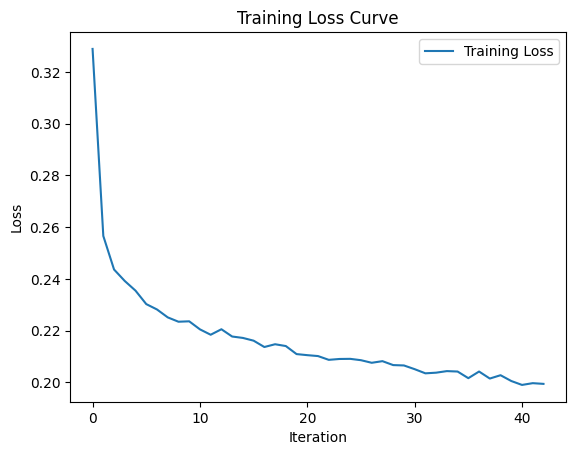

In [6]:
# проверка на оверфит
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# 1. Подготовка данных
X = df.drop(['churn'], axis=1)
y = df['churn']

# Разделение на тренировочные и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Создание модели MLP с увеличением количества итераций, регуляризацией и ранней остановкой
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),
    max_iter=300,
    alpha=0.001,  # Добавляем регуляризацию
    early_stopping=True,  # Включаем раннюю остановку
    random_state=42
)

# 3. Обучение модели
mlp.fit(X_train, y_train)

# 4. Оценка модели
y_pred = mlp.predict(X_test)

# Оценка метрик
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 score: {f1:.4f}")

# 5. Кросс-валидация
cv_scores = cross_val_score(mlp, X, y, cv=40)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean():.4f}")

# 6. Графики обучения
train_losses = mlp.loss_curve_
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()



In [5]:
from sklearn.model_selection import GridSearchCV

# Определение сетки параметров
param_grid = {
    'hidden_layer_sizes': [(128, 64, 32), (64, 32, 16)],
    'max_iter': [300, 500],
    'alpha': [0.001, 0.01, 0.1],
    #'early_stopping': [True, False]
    'early_stopping': [True]
}

# Создание модели
mlp = MLPClassifier(random_state=42)

# Подбор гиперпараметров
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Лучшие параметры
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Оценка модели на тестовых данных
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.4f}")


Best parameters: {'alpha': 0.001, 'early_stopping': True, 'hidden_layer_sizes': (128, 64, 32), 'max_iter': 300}
Best cross-validation score: 0.9304
Test accuracy: 0.9344


Best parameters: {'alpha': 0.001, 'early_stopping': True, 'hidden_layer_sizes': (128, 64, 32), 'max_iter': 300}
Best cross-validation score: 0.9304
Accuracy: 0.9344
Precision: 0.9524
Recall: 0.9290
F1 score: 0.9406
Cross-validation scores: [0.56799054 0.5913612  0.60760991 0.62666945 0.81830829]
Mean cross-validation score: 0.6424


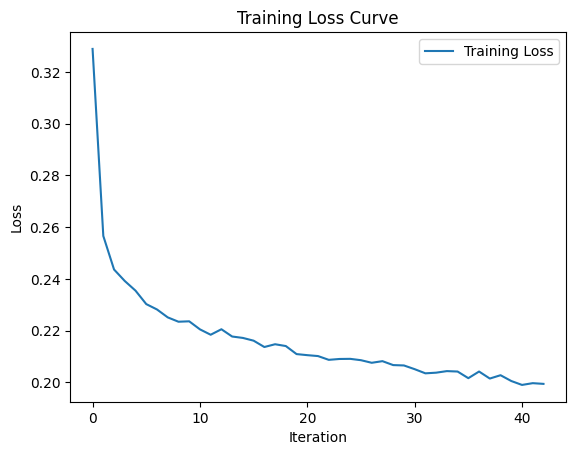

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# 1. Подготовка данных
X = df.drop(['churn'], axis=1)
y = df['churn']

# Разделение на тренировочные и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Определение сетки параметров
param_grid = {
    'hidden_layer_sizes': [(128, 64, 32), (64, 32, 16)],
    'max_iter': [300, 500],
    'alpha': [0.001, 0.01, 0.1],
    'early_stopping': [True]
}

# 3. Создание модели
mlp = MLPClassifier(random_state=42)

# 4. Подбор гиперпараметров
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Лучшие параметры
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# 5. Оценка модели на тестовых данных
y_pred = grid_search.predict(X_test)

# Оценка метрик
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 score: {f1:.4f}")

# 6. Кросс-валидация
cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean():.4f}")

# 7. Графики обучения
train_losses = grid_search.best_estimator_.loss_curve_
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()


In [7]:
'''import pickle
model_filename = 'mlp_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(mlp, file)'''

In [ ]:
# Хорошая модель
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Подготовка данных
X = df.drop(['churn'], axis=1)
y = df['churn']

# Разделение на тренировочные и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Создание модели XGBoost
#model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
model = xgb.XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=6, subsample=0.8, colsample_bytree=0.8, random_state=42)

# 3. Обучение модели
model.fit(X_train, y_train)

# 4. Оценка модели
y_pred = model.predict(X_test)

# Оценка метрик
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 score: {f1:.4f}")


Accuracy: 0.9440
Precision: 0.9588
Recall: 0.9401
F1 score: 0.9493


In [ ]:
'''model_filename = 'xgb_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)'''